In [1]:
from sklearn.cluster import KMeans
from tensorflow.keras.utils import load_img, save_img
from tensorflow.keras.preprocessing.image import img_to_array
import os
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from collections import Counter
from math import sqrt

2022-09-07 21:40:57.275300: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-09-07 21:40:57.279679: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-07 21:40:57.279693: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# Open Picture and convert it to Numpy Array

In [2]:
pic_name = "scan10.jpg"
img_path = os.path.join("..","raw_data", "test-pics",pic_name )
img_path

'../raw_data/test-pics/scan10.jpg'

In [3]:
img_pic = load_img(path=img_path, color_mode="rgb")

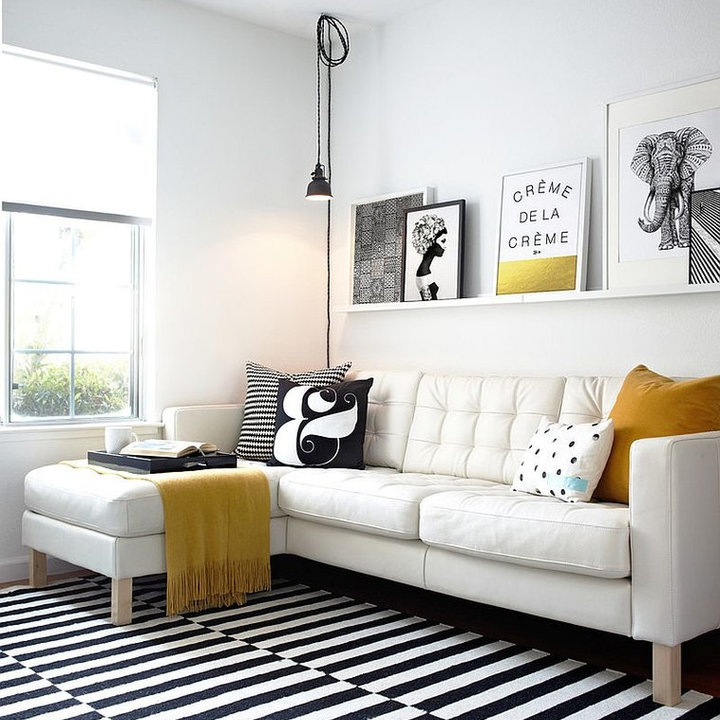

In [4]:
img_pic

In [5]:
img_arr = img_to_array(img_pic).astype("int")



In [6]:
# Number of clusters
k_cluster = 10
clt = KMeans(n_clusters=k_cluster)

In [7]:
# Make a palette printing with color - also creat the list with rgb codes and percentages
def palette_perc(k_cluster):
    width = 300
    palette = np.zeros((50, width, 3), np.uint8)
    
    n_pixels = len(k_cluster.labels_)
    counter = Counter(k_cluster.labels_) # count how many pixels per cluster
    perc = {}
    for i in counter:
        perc[i] = np.round(counter[i]/n_pixels, 2)
    perc = dict(sorted(perc.items()))
    
    #for logging purposes
    print(perc)
    print(k_cluster.cluster_centers_)
    
    step = 0
    
    for idx, centers in enumerate(k_cluster.cluster_centers_): 
        palette[:, step:int(step + perc[idx]*width+1), :] = centers
        step += int(perc[idx]*width+1)
    
    # Combine percentage and color
    dic_color_per = {}
    zipped = list(zip(list(perc.values()), k_cluster.cluster_centers_.astype("int").tolist()))
    # Sort by percentage
    list_per_color = sorted(zipped, key=lambda x: x[0], reverse=True)
    #list_per_color = [(float("%.2f" % x[0]), x[1]) for x in list_per_color]
        
    return palette, list_per_color

In [8]:
# Show images printing
def show_img_compar(img, img_2 ):
    f, ax = plt.subplots(2, 1, figsize=(10,10))
    ax[0].imshow(img)
    ax[1].imshow(img_2)
    ax[0].axis('off')
    ax[1].axis('off')
    f.tight_layout()
    plt.show()

# Result

In [9]:

clt_1 = clt.fit(img_arr.reshape(-1, 3))



In [10]:
palette, dic_color_per = palette_perc(clt_1)


{0: 0.04, 1: 0.24, 2: 0.08, 3: 0.07, 4: 0.09, 5: 0.2, 6: 0.03, 7: 0.05, 8: 0.01, 9: 0.19}
[[109.87730586 106.66685097 104.16360895]
 [234.20535419 233.74225806 231.78534822]
 [ 12.79935536  11.20396265  13.47255534]
 [151.88808398 149.19734288 144.24556464]
 [188.14438183 187.70531162 183.14320514]
 [250.2128025  250.71187549 249.98848556]
 [133.77875261  95.99994032  27.44661295]
 [ 55.31921602  53.93383042  58.10698764]
 [204.82197983 169.08746656  85.35995061]
 [212.32749294 213.35424055 212.0282603 ]]


In [11]:
palette.shape

(50, 300, 3)

In [12]:
# Colors with percentage - sorted by ranking
dic_color_per

[(0.24, [234, 233, 231]),
 (0.2, [250, 250, 249]),
 (0.19, [212, 213, 212]),
 (0.09, [188, 187, 183]),
 (0.08, [12, 11, 13]),
 (0.07, [151, 149, 144]),
 (0.05, [55, 53, 58]),
 (0.04, [109, 106, 104]),
 (0.03, [133, 95, 27]),
 (0.01, [204, 169, 85])]

In [13]:
# As a picture to compare

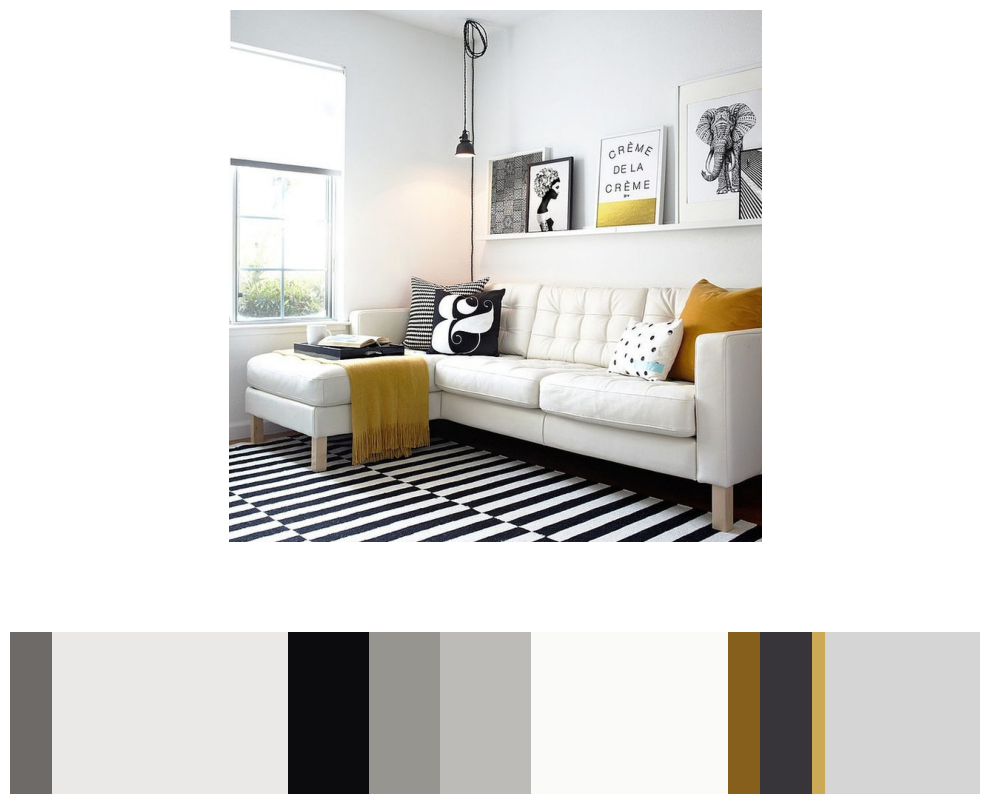

In [14]:
show_img_compar(img_arr, palette)

In [15]:
# Put together dictionary with RBG codes to color names in string

def get_color_names():
    # Path to file with RGB codes and color names
    color_map_path = os.path.join("..","raw_data", "color","color-map.csv" )
    # Make a dataframe
    df = pd.read_csv(color_map_path,sep=";")
    df['rgb-code'] = df['rgb-code'].apply(lambda x: x.strip("''"))
    
    # Create Dictionary with color names and rgb codes
    color_dict = {}
    for index, row in df.iterrows():
        color_dict[df.loc[index, 'c-name']] = [int(x) for x in df.loc[index, 'rgb-code'].replace("(","").replace(")","").split(",")]
    
    return color_dict
    
    


In [16]:
# Find the closest color for an rgb code
def closest_color(rgb,color_dict):
    r = rgb[0]
    g = rgb[1]
    b = rgb[2]
    color_diffs = []
    
    for key, value in color_dict.items():
        cr = color_dict[key][0]
        cg = color_dict[key][1]
        cb = color_dict[key][2]
        color_diff = sqrt((r - cr)**2 + (g - cg)**2 + (b - cb)**2)
        color_diffs.append((color_diff, key))
    return min(color_diffs)[1]

In [17]:
# Get the color names for our complete results
def all_color_names(dic_color_per,color_dict):
    res_list = []
    for res_color in dic_color_per:
        color_name = closest_color(res_color[1],color_dict)
        res_list.append([color_name, res_color[0], res_color[1]])
    
    return res_list
        

In [18]:
color_dict = get_color_names()
pic_cname_perc_rgb = all_color_names(dic_color_per,color_dict)

In [19]:
# Result with name, percentage and RGB code
pic_cname_perc_rgb

[['beige', 0.24, [234, 233, 231]],
 ['white', 0.2, [250, 250, 249]],
 ['pale grey', 0.19, [212, 213, 212]],
 ['silver', 0.09, [188, 187, 183]],
 ['black', 0.08, [12, 11, 13]],
 ['grey', 0.07, [151, 149, 144]],
 ['dim grey', 0.05, [55, 53, 58]],
 ['dim grey', 0.04, [109, 106, 104]],
 ['deep brown', 0.03, [133, 95, 27]],
 ['deep khaki', 0.01, [204, 169, 85]]]

# Complementary colors

In [20]:
# Sum of the min & max of (a, b, c)
def hilo(a, b, c):
    if c < b: b, c = c, b
    if b < a: a, b = b, a
    if c < b: b, c = c, b
    return a + c

# This function takes a [r,g,b] list and returns the complement color as list
def complement(rgb):
    r = rgb[0]
    g = rgb[1]
    b = rgb[2]
    k = hilo(r, g, b)
    return list(k - u for u in (r, g, b))

In [21]:
# manual test
c1 = [18, 15, 37]

In [22]:
c2 = complement(c1)
c2

[34, 37, 15]

(-0.5, 0.5, 0.5, -0.5)

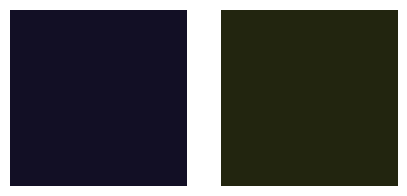

In [23]:
# Show complementary colors next to each other
f, ax = plt.subplots(1, 2, figsize=(5,5))
ax[0].imshow([[c1]])
ax[1].imshow([[c2]])
ax[0].axis('off')
ax[1].axis('off')



In [24]:
dic_color_per

[(0.24, [235, 234, 232]),
 (0.19, [213, 214, 213]),
 (0.18, [250, 251, 250]),
 (0.1, [191, 190, 186]),
 (0.09, [13, 12, 14]),
 (0.07, [157, 154, 149]),
 (0.05, [60, 59, 63]),
 (0.04, [119, 115, 111]),
 (0.03, [133, 95, 27]),
 (0.01, [204, 169, 85])]

In [25]:
# With complemte result list now

def list_complentary_colors(dic_color_per,color_dict):
    res_list_cc = []
    for color in dic_color_per:
        c_rgb = complement(color[1])
        perc = color[0]
        c_name = closest_color(c_rgb,color_dict)
        
        res_list_cc.append([c_name, perc, c_rgb])
    return res_list_cc




In [26]:
pic_cname_perc_rgb

[['linen', 0.24, [235, 234, 232]],
 ['light grey', 0.19, [213, 214, 213]],
 ['snow', 0.18, [250, 251, 250]],
 ['silver', 0.1, [191, 190, 186]],
 ['black', 0.09, [13, 12, 14]],
 ['dark gray', 0.07, [157, 154, 149]],
 ['dark slate gray', 0.05, [60, 59, 63]],
 [' dim grey', 0.04, [119, 115, 111]],
 ['saddle brown', 0.03, [133, 95, 27]],
 ['dark khaki', 0.01, [204, 169, 85]]]

In [27]:
# The list of complementary colors 

In [28]:
comp_colors_cname_perc_rgb = list_complentary_colors(dic_color_per,color_dict)
comp_colors_cname_perc_rgb

[['lavender', 0.24, [232, 233, 235]],
 ['light grey', 0.19, [214, 213, 214]],
 ['snow', 0.18, [251, 250, 251]],
 ['silver', 0.1, [186, 187, 191]],
 ['black', 0.09, [13, 14, 12]],
 ['dark gray', 0.07, [149, 152, 157]],
 ['dark slate gray', 0.05, [62, 63, 59]],
 [' dim grey', 0.04, [111, 115, 119]],
 ['midnight blue', 0.03, [27, 65, 133]],
 ['steel blue', 0.01, [85, 120, 204]]]

In [29]:
pic_cname_perc_rgb

[['linen', 0.24, [235, 234, 232]],
 ['light grey', 0.19, [213, 214, 213]],
 ['snow', 0.18, [250, 251, 250]],
 ['silver', 0.1, [191, 190, 186]],
 ['black', 0.09, [13, 12, 14]],
 ['dark gray', 0.07, [157, 154, 149]],
 ['dark slate gray', 0.05, [60, 59, 63]],
 [' dim grey', 0.04, [119, 115, 111]],
 ['saddle brown', 0.03, [133, 95, 27]],
 ['dark khaki', 0.01, [204, 169, 85]]]

In [30]:
len(comp_colors_cname_perc_rgb)

10

In [31]:
# Show images printing
def show_colorbar(comp_colors_cname_perc_rgb):
    n_colors = len(comp_colors_cname_perc_rgb)
    f, ax = plt.subplots(1, n_colors, figsize=(20,5))
    
    for index, color in enumerate(comp_colors_cname_perc_rgb):
        ax[index].imshow([[color[2]]])
        ax[index].axis('off')

    #plt.show()

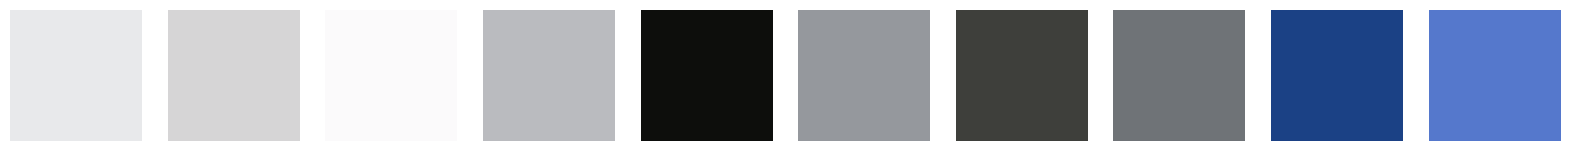

In [32]:
show_colorbar(comp_colors_cname_perc_rgb)

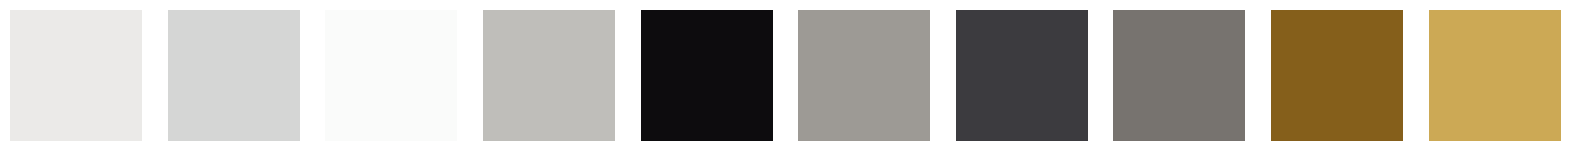

In [33]:
show_colorbar(pic_cname_perc_rgb)

In [34]:
pic_cname_perc_rgb

[['linen', 0.24, [235, 234, 232]],
 ['light grey', 0.19, [213, 214, 213]],
 ['snow', 0.18, [250, 251, 250]],
 ['silver', 0.1, [191, 190, 186]],
 ['black', 0.09, [13, 12, 14]],
 ['dark gray', 0.07, [157, 154, 149]],
 ['dark slate gray', 0.05, [60, 59, 63]],
 [' dim grey', 0.04, [119, 115, 111]],
 ['saddle brown', 0.03, [133, 95, 27]],
 ['dark khaki', 0.01, [204, 169, 85]]]

In [35]:
pic_cname_perc_rgb[0]

['linen', 0.24, [235, 234, 232]]

In [46]:
# Select colors to use - Percentage and kick out specific colors
def color_below_percentage(color_list):
    
    ignore_colors = ["black", "grey", "white"]
       
    res_list = []
    for color in color_list:
        if "black" in color[0].lower() or "grey" in color[0].lower() or "white" in color[0].lower() \
        or "gray" in color[0].lower():
            pass
        elif color[1] > 0.15:
            pass
        else:
            res_list.append(color)
    return res_list
            

In [47]:
# From picture colors
colors_filtered = color_below_percentage(pic_cname_perc_rgb)
colors_filtered

[['silver', 0.1, [191, 190, 186]],
 ['saddle brown', 0.03, [133, 95, 27]],
 ['dark khaki', 0.01, [204, 169, 85]]]

In [49]:
# For complementory colors
comp_colors_filtered = color_below_percentage(comp_colors_cname_perc_rgb)
comp_colors_filtered 

[['silver', 0.1, [186, 187, 191]],
 ['midnight blue', 0.03, [27, 65, 133]],
 ['steel blue', 0.01, [85, 120, 204]]]

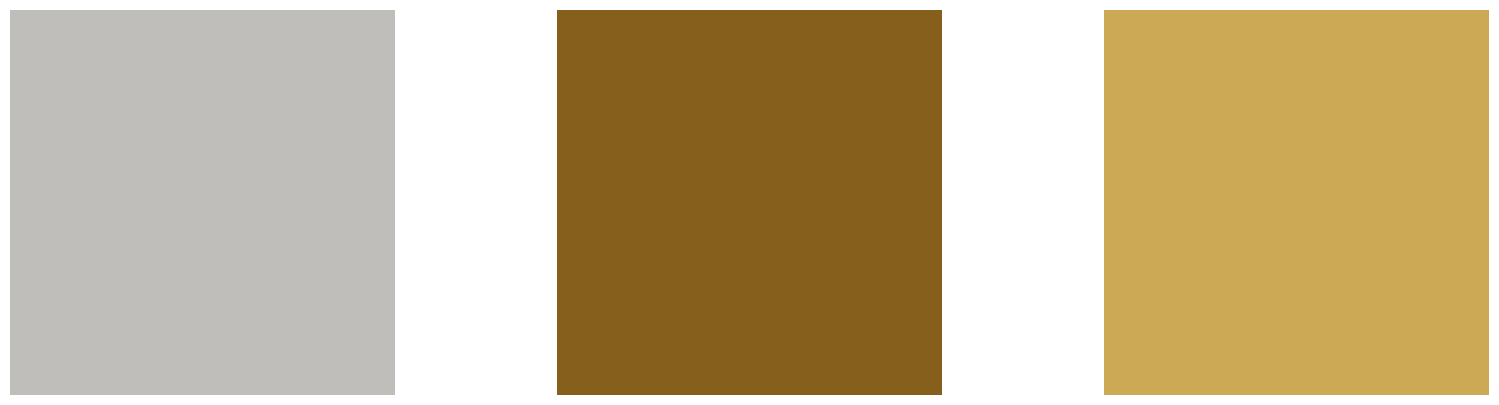

In [50]:
show_colorbar(colors_filtered)

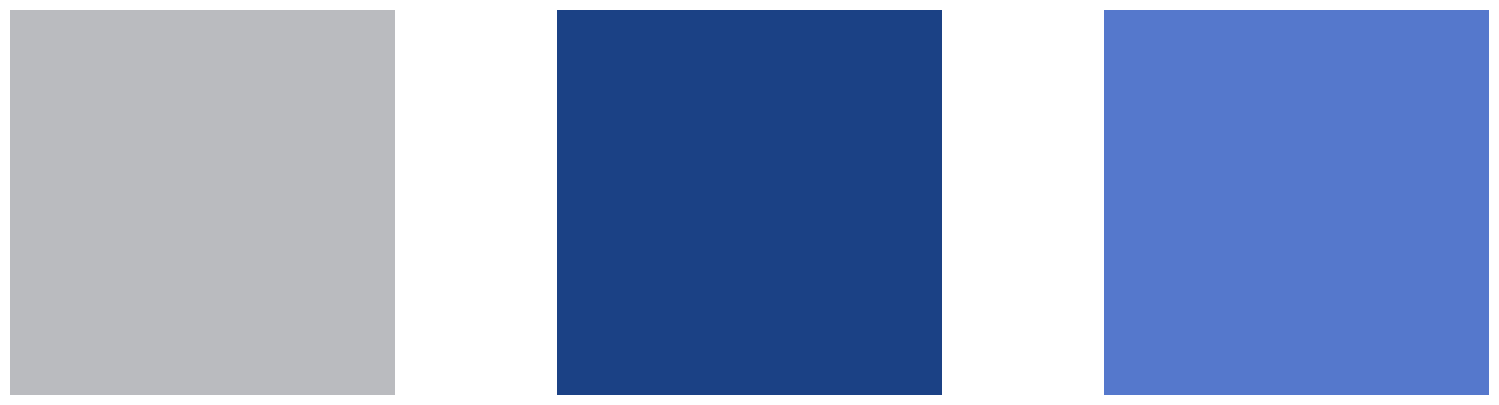

In [51]:
show_colorbar(comp_colors_filtered)

In [52]:
def final_color_list(pic_cname_perc_rgb, comp_colors_cname_perc_rgb,colors_real_pic,colors_complementary):
    
    # Select the number of colors to use
    i = 0
    c_i = 0
    
    res_list = []
    
    # Add two from the real picture colors
    for color in color_below_percentage(pic_cname_perc_rgb):
        if i < colors_real_pic:
            res_list.append(color)
            i += 1

    # Add one picture from the complementary colors
    for color_c in color_below_percentage(comp_colors_cname_perc_rgb):
        if c_i < 1:
            res_list.append(color_c)
            c_i += 1      
    
    return res_list

In [54]:
final_list_colors = final_color_list(pic_cname_perc_rgb, comp_colors_cname_perc_rgb,2,1)
final_list_colors

[['silver', 0.1, [191, 190, 186]],
 ['saddle brown', 0.03, [133, 95, 27]],
 ['silver', 0.1, [186, 187, 191]]]

In [45]:
show_colorbar(final_color_list(pic_cname_perc_rgb, comp_colors_cname_perc_rgb))

TypeError: final_color_list() missing 2 required positional arguments: 'colors_real_pic' and 'colors_complementary'